# SHANMUKA RANA PRATHAP CHOWDARY PONNAGANTI U97674115

# Indian Oil Corporation Limited (IOC.NS)

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os
import datetime as dt
# to make this notebook's output stable across runs
np.random.seed(42)
import seaborn as sns
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd
import yfinance as yf


In [2]:
ioc = yf.download(tickers='IOC.NS', period='100d', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
ioc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-25,72.199997,73.949997,71.650002,73.349998,73.349998,22422462
2022-11-28,73.900002,76.449997,73.900002,76.199997,76.199997,40695313
2022-11-29,76.449997,76.699997,75.000000,75.300003,75.300003,17421133
2022-11-30,74.500000,77.000000,74.449997,76.650002,76.650002,29122442
2022-12-01,77.000000,77.150002,76.000000,76.199997,76.199997,15072561
...,...,...,...,...,...,...
2023-04-17,77.199997,77.449997,76.800003,77.250000,77.250000,7736935
2023-04-18,77.199997,78.099998,77.199997,78.000000,78.000000,5096362
2023-04-19,77.949997,78.750000,77.699997,78.550003,78.550003,7940271


In [5]:
ioc.to_csv

<bound method NDFrame.to_csv of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-11-25  72.199997  73.949997  71.650002  73.349998  73.349998  22422462
2022-11-28  73.900002  76.449997  73.900002  76.199997  76.199997  40695313
2022-11-29  76.449997  76.699997  75.000000  75.300003  75.300003  17421133
2022-11-30  74.500000  77.000000  74.449997  76.650002  76.650002  29122442
2022-12-01  77.000000  77.150002  76.000000  76.199997  76.199997  15072561
...               ...        ...        ...        ...        ...       ...
2023-04-17  77.199997  77.449997  76.800003  77.250000  77.250000   7736935
2023-04-18  77.199997  78.099998  77.199997  78.000000  78.000000   5096362
2023-04-19  77.949997  78.750000  77.699997  78.550003  78.550003   7940271
2023-04-20  78.900002  79.099998  78.099998  78.199997  78.199997   7789377
2023-04-21  78.750000  78.750000  77.849998  78.250000  

In [6]:
ioc.to_csv('ioc.csv', index=True)


In [7]:
ioc.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-25,72.199997,73.949997,71.650002,73.349998,73.349998,22422462
1,2022-11-28,73.900002,76.449997,73.900002,76.199997,76.199997,40695313
2,2022-11-29,76.449997,76.699997,75.000000,75.300003,75.300003,17421133
3,2022-11-30,74.500000,77.000000,74.449997,76.650002,76.650002,29122442
4,2022-12-01,77.000000,77.150002,76.000000,76.199997,76.199997,15072561
...,...,...,...,...,...,...,...
95,2023-04-17,77.199997,77.449997,76.800003,77.250000,77.250000,7736935
96,2023-04-18,77.199997,78.099998,77.199997,78.000000,78.000000,5096362
97,2023-04-19,77.949997,78.750000,77.699997,78.550003,78.550003,7940271
98,2023-04-20,78.900002,79.099998,78.099998,78.199997,78.199997,7789377


In [8]:
#Drop the columns Datewe don't need

ioc=ioc[ioc.columns.difference(['Open', 'High', 'Low', 'Adj Close', 'Volume'])].reset_index()

In [9]:
ioc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    100 non-null    datetime64[ns]
 1   Close   100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


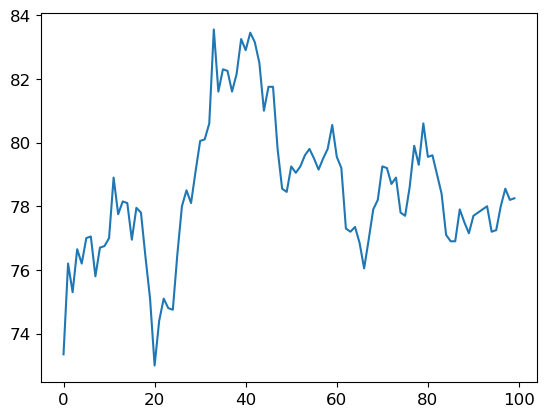

In [10]:
#Plot close

plt.plot(ioc['Close'])
plt.show()

### RESHAPE the data set!

In [11]:
ioc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    100 non-null    datetime64[ns]
 1   Close   100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


In [12]:
ioc.shape

(100, 2)

In [13]:
ioc.groupby(['Date']).count()

,Close
Date,
2022-11-25,1
2022-11-28,1
2022-11-29,1
2022-11-30,1
2022-12-01,1
...,...
2023-04-17,1
2023-04-18,1
2023-04-19,1


In [14]:
ioc.head(10)

,Date,Close
0,2022-11-25,73.349998
1,2022-11-28,76.199997
2,2022-11-29,75.300003
3,2022-11-30,76.650002
4,2022-12-01,76.199997
5,2022-12-02,77.000000
6,2022-12-05,77.050003
7,2022-12-06,75.800003
8,2022-12-07,76.699997
9,2022-12-08,76.750000


<AxesSubplot:xlabel='Date', ylabel='Close'>

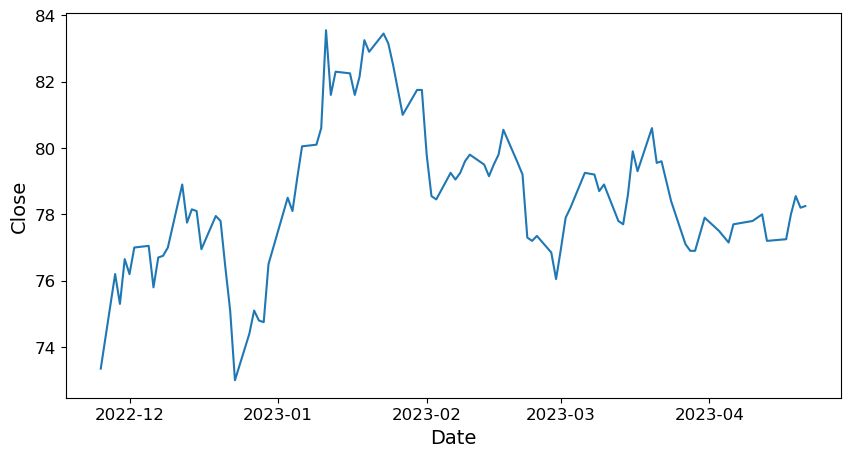

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date',y='Close',data=ioc)

In [16]:
# Re-organize the data set by day and hours

temp = np.array(ioc['Close']).reshape(10,10)

temp

array([[73.34999847, 76.19999695, 75.30000305, 76.65000153, 76.19999695,
        77.        , 77.05000305, 75.80000305, 76.69999695, 76.75      ],
       [77.        , 78.90000153, 77.75      , 78.15000153, 78.09999847,
        76.94999695, 77.94999695, 77.80000305, 76.40000153, 75.09999847],
       [73.        , 74.40000153, 75.09999847, 74.80000305, 74.75      ,
        76.5       , 78.        , 78.5       , 78.09999847, 79.09999847],
       [80.05000305, 80.09999847, 80.59999847, 83.55000305, 81.59999847,
        82.30000305, 82.25      , 81.59999847, 82.15000153, 83.25      ],
       [82.90000153, 83.44999695, 83.15000153, 82.5       , 81.        ,
        81.75      , 81.75      , 79.80000305, 78.55000305, 78.44999695],
       [79.25      , 79.05000305, 79.25      , 79.59999847, 79.80000305,
        79.5       , 79.15000153, 79.5       , 79.80000305, 80.55000305],
       [79.55000305, 79.19999695, 77.30000305, 77.19999695, 77.34999847,
        76.84999847, 76.05000305, 76.94999695

In [17]:
ioc.shape

(100, 2)

In [18]:
# Convert to dataframe

temp_df = pd.DataFrame(temp, columns=np.arange(0,10,1))

temp_df

,0,1,2,3,4,5,6,7,8,9
0,73.349998,76.199997,75.300003,76.650002,76.199997,77.000000,77.050003,75.800003,76.699997,76.750000
1,77.000000,78.900002,77.750000,78.150002,78.099998,76.949997,77.949997,77.800003,76.400002,75.099998
2,73.000000,74.400002,75.099998,74.800003,74.750000,76.500000,78.000000,78.500000,78.099998,79.099998
3,80.050003,80.099998,80.599998,83.550003,81.599998,82.300003,82.250000,81.599998,82.150002,83.250000
4,82.900002,83.449997,83.150002,82.500000,81.000000,81.750000,81.750000,79.800003,78.550003,78.449997
5,79.250000,79.050003,79.250000,79.599998,79.800003,79.500000,79.150002,79.500000,79.800003,80.550003
6,79.550003,79.199997,77.300003,77.199997,77.349998,76.849998,76.050003,76.949997,77.900002,78.199997
7,79.250000,79.199997,78.699997,78.900002,77.800003,77.699997,78.599998,79.900002,79.300003,80.599998
8,79.550003,79.599998,79.000000,78.400002,77.099998,76.900002,76.900002,77.900002,77.500000,77.150002
9,77.699997,77.800003,77.900002,78.000000,77.199997,77.250000,78.000000,78.550003,78.199997,78.250000


### Standardization

In [19]:
# Let's create a single sequence (i.e., feature) for standardization

temp_1feature = np.array(temp_df).ravel().reshape(-1,1)

temp_1feature.shape

(100, 1)

In [20]:
temp_1feature

array([[73.34999847],
       [76.19999695],
       [75.30000305],
       [76.65000153],
       [76.19999695],
       [77.        ],
       [77.05000305],
       [75.80000305],
       [76.69999695],
       [76.75      ],
       [77.        ],
       [78.90000153],
       [77.75      ],
       [78.15000153],
       [78.09999847],
       [76.94999695],
       [77.94999695],
       [77.80000305],
       [76.40000153],
       [75.09999847],
       [73.        ],
       [74.40000153],
       [75.09999847],
       [74.80000305],
       [74.75      ],
       [76.5       ],
       [78.        ],
       [78.5       ],
       [78.09999847],
       [79.09999847],
       [80.05000305],
       [80.09999847],
       [80.59999847],
       [83.55000305],
       [81.59999847],
       [82.30000305],
       [82.25      ],
       [81.59999847],
       [82.15000153],
       [83.25      ],
       [82.90000153],
       [83.44999695],
       [83.15000153],
       [82.5       ],
       [81.        ],
       [81

### Standardizing  the values

In [21]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp_std = scaler.fit_transform(temp_1feature)

In [22]:
temp_reshaped = temp_std.reshape(10,10)

temp_reshaped.shape

(10, 10)

In [23]:
#Pandas version of the reshaped data

pd.DataFrame(temp_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,-2.372470,-1.056740,-1.472231,-0.848992,-1.056740,-0.687411,-0.664327,-1.241402,-0.825911,-0.802826
1,-0.687411,0.189743,-0.341167,-0.156502,-0.179586,-0.710496,-0.248836,-0.318082,-0.964406,-1.564565
2,-2.534050,-1.887726,-1.564565,-1.703061,-1.726146,-0.918241,-0.225752,0.005078,-0.179586,0.282073
3,0.720652,0.743733,0.974563,2.336461,1.436222,1.759386,1.736302,1.436222,1.690137,2.197962
4,2.036381,2.290292,2.151796,1.851717,1.159227,1.505472,1.505472,0.605237,0.028163,-0.018006
5,0.351323,0.258992,0.351323,0.512903,0.605237,0.466738,0.305158,0.466738,0.605237,0.951482
6,0.489822,0.328239,-0.548912,-0.595081,-0.525831,-0.756661,-1.125987,-0.710496,-0.271917,-0.133421
7,0.351323,0.328239,0.097409,0.189743,-0.318082,-0.364251,0.051243,0.651402,0.374407,0.974563
8,0.489822,0.512903,0.235908,-0.041087,-0.641246,-0.733577,-0.733577,-0.271917,-0.456581,-0.618162
9,-0.364251,-0.318082,-0.271917,-0.225752,-0.595081,-0.571996,-0.225752,0.028163,-0.133421,-0.110337


### spliting the data

In [24]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(temp_reshaped, test_size=0.3)

In [25]:
train.shape

(7, 10)

In [26]:
test.shape

(3, 10)

### Create Input and Target values

In [27]:
train_inputs = train[:,:9]


pd.DataFrame(train_inputs)

,0,1,2,3,4,5,6,7,8
0,-2.372470,-1.056740,-1.472231,-0.848992,-1.056740,-0.687411,-0.664327,-1.241402,-0.825911
1,0.351323,0.328239,0.097409,0.189743,-0.318082,-0.364251,0.051243,0.651402,0.374407
2,-2.534050,-1.887726,-1.564565,-1.703061,-1.726146,-0.918241,-0.225752,0.005078,-0.179586
3,-0.364251,-0.318082,-0.271917,-0.225752,-0.595081,-0.571996,-0.225752,0.028163,-0.133421
4,2.036381,2.290292,2.151796,1.851717,1.159227,1.505472,1.505472,0.605237,0.028163
5,0.720652,0.743733,0.974563,2.336461,1.436222,1.759386,1.736302,1.436222,1.690137
6,0.489822,0.328239,-0.548912,-0.595081,-0.525831,-0.756661,-1.125987,-0.710496,-0.271917


In [28]:
train_inputs

array([[-2.37246981, -1.05674046, -1.47223135, -0.8489915 , -1.05674046,
        -0.68741132, -0.66432693, -1.24140151, -0.82591063],
       [ 0.35132293,  0.32823854,  0.0974087 ,  0.18974275, -0.31808218,
        -0.36425096,  0.05124344,  0.65140242,  0.37440732],
       [-2.53404999, -1.88772575, -1.56456539, -1.70306118, -1.72614557,
        -0.91824115, -0.22575165,  0.00507818, -0.17958639],
       [-0.36425096, -0.31808218, -0.27191692, -0.22575165, -0.5950808 ,
        -0.5719964 , -0.22575165,  0.02816257, -0.13342113],
       [ 2.03638142,  2.29029212,  2.15179633,  1.85171685,  1.15922735,
         1.5054721 ,  1.5054721 ,  0.60523715,  0.02816257],
       [ 0.72065207,  0.74373294,  0.97456277,  2.3364609 ,  1.43622244,
         1.75938632,  1.73630193,  1.43622244,  1.69013667],
       [ 0.48982224,  0.32823854, -0.54891201, -0.5950808 , -0.52583114,
        -0.75666098, -1.1259866 , -0.71049571, -0.27191692]])

In [29]:
train_inputs.shape 

(7, 9)

In [30]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

In [31]:
train_x

array([[[-2.37246981],
        [-1.05674046],
        [-1.47223135],
        [-0.8489915 ],
        [-1.05674046],
        [-0.68741132],
        [-0.66432693],
        [-1.24140151],
        [-0.82591063]],

       [[ 0.35132293],
        [ 0.32823854],
        [ 0.0974087 ],
        [ 0.18974275],
        [-0.31808218],
        [-0.36425096],
        [ 0.05124344],
        [ 0.65140242],
        [ 0.37440732]],

       [[-2.53404999],
        [-1.88772575],
        [-1.56456539],
        [-1.70306118],
        [-1.72614557],
        [-0.91824115],
        [-0.22575165],
        [ 0.00507818],
        [-0.17958639]],

       [[-0.36425096],
        [-0.31808218],
        [-0.27191692],
        [-0.22575165],
        [-0.5950808 ],
        [-0.5719964 ],
        [-0.22575165],
        [ 0.02816257],
        [-0.13342113]],

       [[ 2.03638142],
        [ 2.29029212],
        [ 2.15179633],
        [ 1.85171685],
        [ 1.15922735],
        [ 1.5054721 ],
        [ 1.5054721 ],
   

### set the target

In [32]:
train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-0.802826
1,0.974563
2,0.282073
3,-0.110337
4,-0.018006
5,2.197962
6,-0.133421


In [33]:
test.shape

(3, 10)

In [34]:
# The first 9 columns (from 0 to 8) are inputs

test_inputs = test[:,:9]

In [35]:
#Create an additional dimension for test

test_x = test_inputs[...,np.newaxis]

test_x.shape 

(3, 9, 1)

In [36]:
# The last column (9) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,-0.618162
1,-1.564565
2,0.951482


## A normal (cross-sectional) NN

In [37]:
model = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 836ms/step - loss: 1.0101
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.9755
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.9423
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 0.9104
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 0.8798
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.8513
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.8247
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7991
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7740
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 0.7501
Epoch 11/100
1/1 [==============================] - 0s 29ms/step - loss: 0.7273
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 0.7056
Epoch 13/100
1/1 [==============================

In [38]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 142ms/step


In [39]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [40]:
comparison

,actual,predicted
0,77.150002,78.454422
1,75.099998,76.959167
2,80.550003,80.193886


In [41]:
mean_squared_error(comparison['actual'], comparison['predicted'])

1.7616138848437306

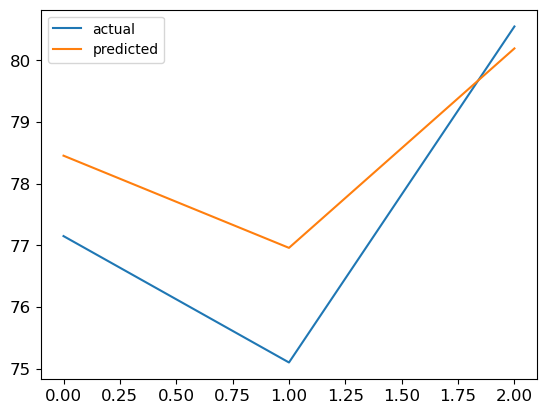

In [42]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN

In [43]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [44]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 1.0074
Epoch 2/30
1/1 [==============================] - 0s 21ms/step - loss: 0.9805
Epoch 3/30
1/1 [==============================] - 0s 16ms/step - loss: 0.9549
Epoch 4/30
1/1 [==============================] - 0s 16ms/step - loss: 0.9307
Epoch 5/30
1/1 [==============================] - 0s 22ms/step - loss: 0.9089
Epoch 6/30
1/1 [==============================] - 0s 28ms/step - loss: 0.8883
Epoch 7/30
1/1 [==============================] - 0s 27ms/step - loss: 0.8685
Epoch 8/30
1/1 [==============================] - 0s 17ms/step - loss: 0.8494
Epoch 9/30
1/1 [==============================] - 0s 23ms/step - loss: 0.8308
Epoch 10/30
1/1 [==============================] - 0s 15ms/step - loss: 0.8124
Epoch 11/30
1/1 [==============================] - 0s 18ms/step - loss: 0.7946
Epoch 12/30
1/1 [==============================] - 0s 23ms/step - loss: 0.7773
Epoch 13/30
1/1 [==============================] - 0s 26ms/step

In [45]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 205ms/step


In [46]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [47]:
comparison

,actual,predicted
0,77.150002,78.090126
1,75.099998,77.737320
2,80.550003,78.946465


In [48]:
mean_squared_error(comparison['actual'], comparison['predicted'])

3.470211469451897

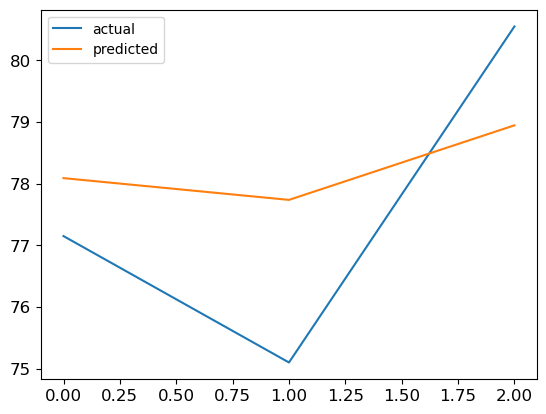

In [49]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### Simple RNN with more layers

In [50]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.8741
Epoch 2/30
1/1 [==============================] - 0s 9ms/step - loss: 0.8366
Epoch 3/30
1/1 [==============================] - 0s 8ms/step - loss: 0.8031
Epoch 4/30
1/1 [==============================] - 0s 8ms/step - loss: 0.7766
Epoch 5/30
1/1 [==============================] - 0s 28ms/step - loss: 0.7514
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 0.7269
Epoch 7/30
1/1 [==============================] - 0s 15ms/step - loss: 0.7010
Epoch 8/30
1/1 [==============================] - 0s 8ms/step - loss: 0.6771
Epoch 9/30
1/1 [==============================] - 0s 18ms/step - loss: 0.6558
Epoch 10/30
1/1 [==============================] - 0s 9ms/step - loss: 0.6329
Epoch 11/30
1/1 [==============================] - 0s 21ms/step - loss: 0.6110
Epoch 12/30
1/1 [==============================] - 0s 29ms/step - loss: 0.5906
Epoch 13/30
1/1 [==============================] - 0s 13ms/step - lo

In [52]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 463ms/step


In [53]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [54]:
comparison

,actual,predicted
0,77.150002,78.617622
1,75.099998,78.250618
2,80.550003,79.059044


In [55]:
mean_squared_error(comparison['actual'], comparison['predicted'])

4.767757824719108

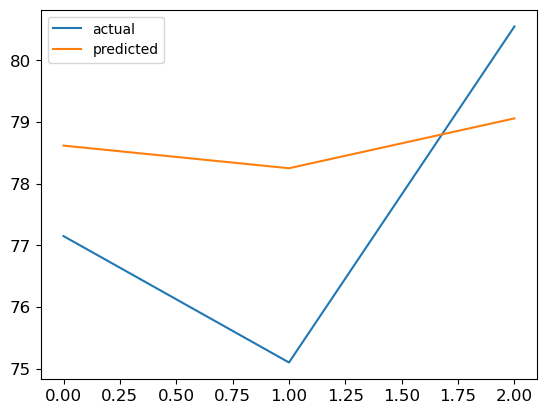

In [56]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### LSTM with one layer

In [57]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 1.0393
Epoch 2/30
1/1 [==============================] - 0s 12ms/step - loss: 1.0181
Epoch 3/30
1/1 [==============================] - 0s 12ms/step - loss: 0.9974
Epoch 4/30
1/1 [==============================] - 0s 10ms/step - loss: 0.9770
Epoch 5/30
1/1 [==============================] - 0s 10ms/step - loss: 0.9571
Epoch 6/30
1/1 [==============================] - 0s 7ms/step - loss: 0.9377
Epoch 7/30
1/1 [==============================] - 0s 20ms/step - loss: 0.9187
Epoch 8/30
1/1 [==============================] - 0s 28ms/step - loss: 0.9002
Epoch 9/30
1/1 [==============================] - 0s 16ms/step - loss: 0.8821
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 0.8645
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 0.8473
Epoch 12/30
1/1 [==============================] - 0s 17ms/step - loss: 0.8305
Epoch 13/30
1/1 [==============================] - 0s 17ms/step -

In [59]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 244ms/step


In [60]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [61]:
mean_squared_error(comparison['actual'], comparison['predicted'])

4.684581813150241

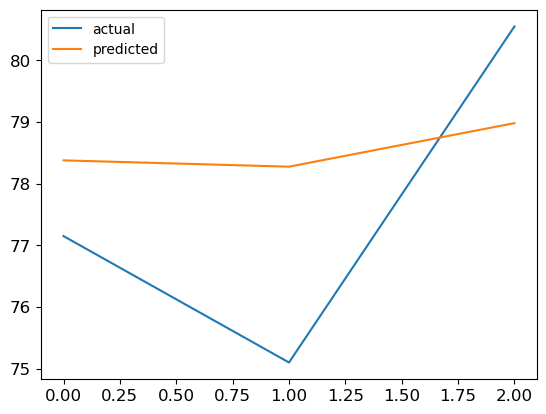

In [62]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### LSTM with more layers

In [63]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [64]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 1.0052
Epoch 2/30
1/1 [==============================] - 0s 16ms/step - loss: 0.9537
Epoch 3/30
1/1 [==============================] - 0s 13ms/step - loss: 0.9055
Epoch 4/30
1/1 [==============================] - 0s 15ms/step - loss: 0.8602
Epoch 5/30
1/1 [==============================] - 0s 33ms/step - loss: 0.8176
Epoch 6/30
1/1 [==============================] - 0s 30ms/step - loss: 0.7775
Epoch 7/30
1/1 [==============================] - 0s 33ms/step - loss: 0.7399
Epoch 8/30
1/1 [==============================] - 0s 33ms/step - loss: 0.7050
Epoch 9/30
1/1 [==============================] - 0s 26ms/step - loss: 0.6729
Epoch 10/30
1/1 [==============================] - 0s 16ms/step - loss: 0.6439
Epoch 11/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6184
Epoch 12/30
1/1 [==============================] - 0s 14ms/step - loss: 0.5968
Epoch 13/30
1/1 [==============================] - 0s 28ms/step

In [65]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 1s/step


In [66]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [67]:
mean_squared_error(comparison['actual'], comparison['predicted'])

5.617538110081417

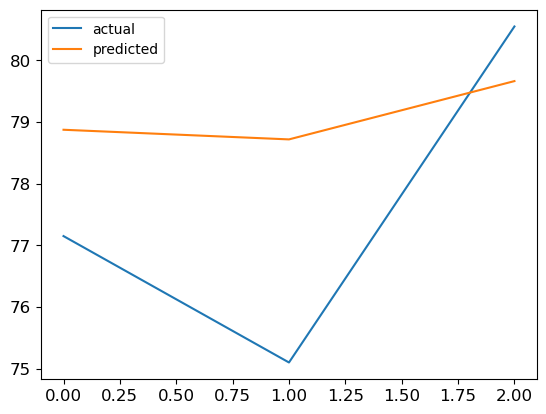

In [68]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### GRU (with more layers)

In [69]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [70]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 0.8377
Epoch 2/30
1/1 [==============================] - 0s 17ms/step - loss: 0.7735
Epoch 3/30
1/1 [==============================] - 0s 17ms/step - loss: 0.7314
Epoch 4/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6981
Epoch 5/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6689
Epoch 6/30
1/1 [==============================] - 0s 33ms/step - loss: 0.6427
Epoch 7/30
1/1 [==============================] - 0s 26ms/step - loss: 0.6186
Epoch 8/30
1/1 [==============================] - 0s 24ms/step - loss: 0.5953
Epoch 9/30
1/1 [==============================] - 0s 11ms/step - loss: 0.5737
Epoch 10/30
1/1 [==============================] - 0s 30ms/step - loss: 0.5520
Epoch 11/30
1/1 [==============================] - 0s 32ms/step - loss: 0.5312
Epoch 12/30
1/1 [==============================] - 0s 29ms/step - loss: 0.5113
Epoch 13/30
1/1 [==============================] - 0s 22ms/step

In [71]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 567ms/step


In [72]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [73]:
mean_squared_error(comparison['actual'], comparison['predicted'])

3.5948151219054125

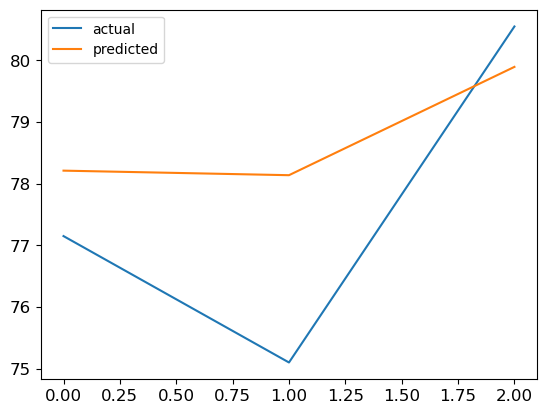

In [74]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### Conv1D

In [75]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [76]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.9051
Epoch 2/30
1/1 [==============================] - 0s 28ms/step - loss: 0.8789
Epoch 3/30
1/1 [==============================] - 0s 16ms/step - loss: 0.8532
Epoch 4/30
1/1 [==============================] - 0s 35ms/step - loss: 0.8282
Epoch 5/30
1/1 [==============================] - 0s 32ms/step - loss: 0.8056
Epoch 6/30
1/1 [==============================] - 0s 40ms/step - loss: 0.7853
Epoch 7/30
1/1 [==============================] - 0s 38ms/step - loss: 0.7668
Epoch 8/30
1/1 [==============================] - 0s 31ms/step - loss: 0.7465
Epoch 9/30
1/1 [==============================] - 0s 30ms/step - loss: 0.7257
Epoch 10/30
1/1 [==============================] - 0s 33ms/step - loss: 0.7045
Epoch 11/30
1/1 [==============================] - 0s 32ms/step - loss: 0.6825
Epoch 12/30
1/1 [==============================] - 0s 34ms/step - loss: 0.6596
Epoch 13/30
1/1 [==============================] - 0s 15ms/step

In [77]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 444ms/step


In [78]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [79]:
mean_squared_error(comparison['actual'], comparison['predicted'])

3.9410993980127387

# By fitting the all the given models I.E A normal NN, simple RNN, simpleRNN with more layers, LSTM, LSTM with more layers, GRU with more layers, conv1D. Accoriding to my point view by the performance of all the given models, A normal NN has the less rmse values than the other models with 1.76. It appears that of all the models you tested, the normal NN model you trained has the lowest RMSE value. This shows that the normal NN model can match the data more accurately than the other models.It is important to remember that a model's performance might vary depending on a number of variables, including the size of the dataset, the difficulty of the problem, the accuracy of the data, and the hyperparameters used for the model.
# At last A normal NN has the less rmse value with 1.76 followed by the simple RNN value with the 3.47